# Practical 3: Solving equations with the finite-difference method

We will solve this toy model of an ice sheet using two apporaches:

$$
\frac{dH}{dt} = \frac{H_f - H}{B}
$$

where $H$ is the ice thickness, $t$ is time, $B$ is a decay constant, and $H_f$ is the thickness that the ice sheet is relaxing towards.

This is a very simple model which contains no physics, other than the general idea that ice sheets do relax towards a steady state size and shape if the climate does not change in time. But the good thing about it being so simple is that we can solve it analytically. This means that we can test out our numerical methods against a 'true' analytical solution. 

The analytical solution to this equation is

$$ 
H = H_f \left(1- \exp\left(\frac{-t}{B}\right)\right)
$$

You can check this by plugging it back in the toy model. 

This is straight forward to compute. But we will also compute the answer numerically. Even though in this case we can get the answer directly from the equation above, often we cannot solve our model equations analytically, so we need to use numerical methods like finite difference. 

The finite-difference approximation of the time derivative in our model is

$$
\frac{dH}{dt} = \frac{H^{j+1} - H^j}{\Delta t}
$$
where we have, again, descritizing our time domain into timesteps which are $\Delta t$ apart in time and are denoted by the index $j$. 

Putting this expression back into our toy model and adding a $j$ superscript to the $H$ on the right-hand-side gives

$$
\frac{H^{j+1} - H^j}{\Delta t}  = \frac{H_f - H^j}{B}
$$
and rearranging for the only unknown, $H^{j+1}$, gives:

$$
H^{j+1} = H^j + \Delta t \frac{H_f - H^j}{B}
$$

This is analagous to the exercize in practical 1, when we found pressure in each grid cell iteratively using the value of the pressure in the grid cell immediately above - in this case we are finding the ice thickness at the next time step based on the ice thickness at the current time step. 

We expect the finite-difference approximation to be a closer respresentation of the original model, the smaller the time step is. We will test this expectation below by:
1. computing the analytical solution
2. solving the model numerically using the equation above
3. computing the difference between the two solutions
4. seeing how this difference depends on the timestep, $\Delta t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the analytical solution


In [2]:
H_f = 1000.0   # final ice thickness [m] 
B = 150.0      # decay constant in our model [years]

In [3]:
T = 1000        # duration of simulation [years]

dt1 = 0.1       # time step  [years]

t = np.arange(0, T, dt1)    # time vector

H_analytical = H_f * (1-np.exp(-t/B))

Plot the analytical solution

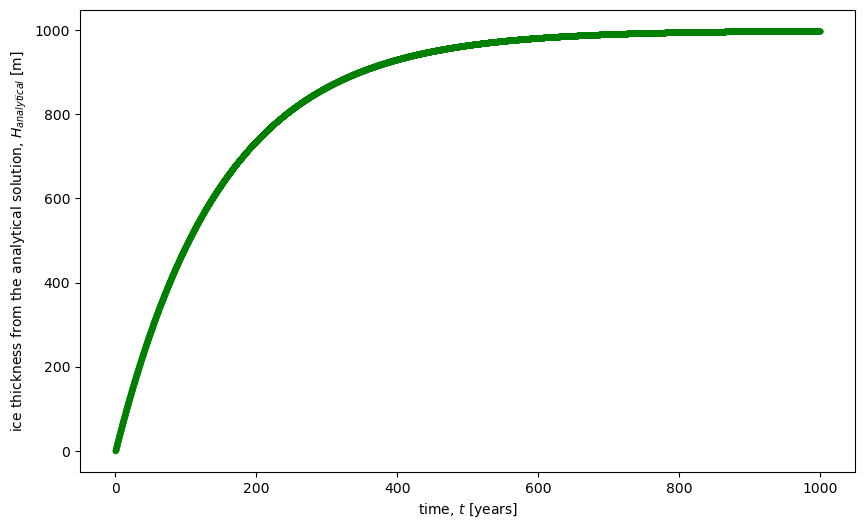

In [4]:
plt.figure(figsize=(10,6))
plt.plot(t, H_analytical, '.g')
plt.xlabel('time, $t$ [years]')
plt.ylabel('ice thickness from the analytical solution, $H_{analytical}$ [m]');

# Solve the model numerically 
- We follow a similar approach to how we solved the pressure equation in the first practical.
- We loop over the values of the ice-thickness vector, each time computing the value using the value at the previous time step


In [5]:
H_numerical = t*0

for index in np.arange(start = 1, stop = len(t)):
    H_numerical[index] = H_numerical[index-1] + dt1*(H_f - H_numerical[index-1])/B

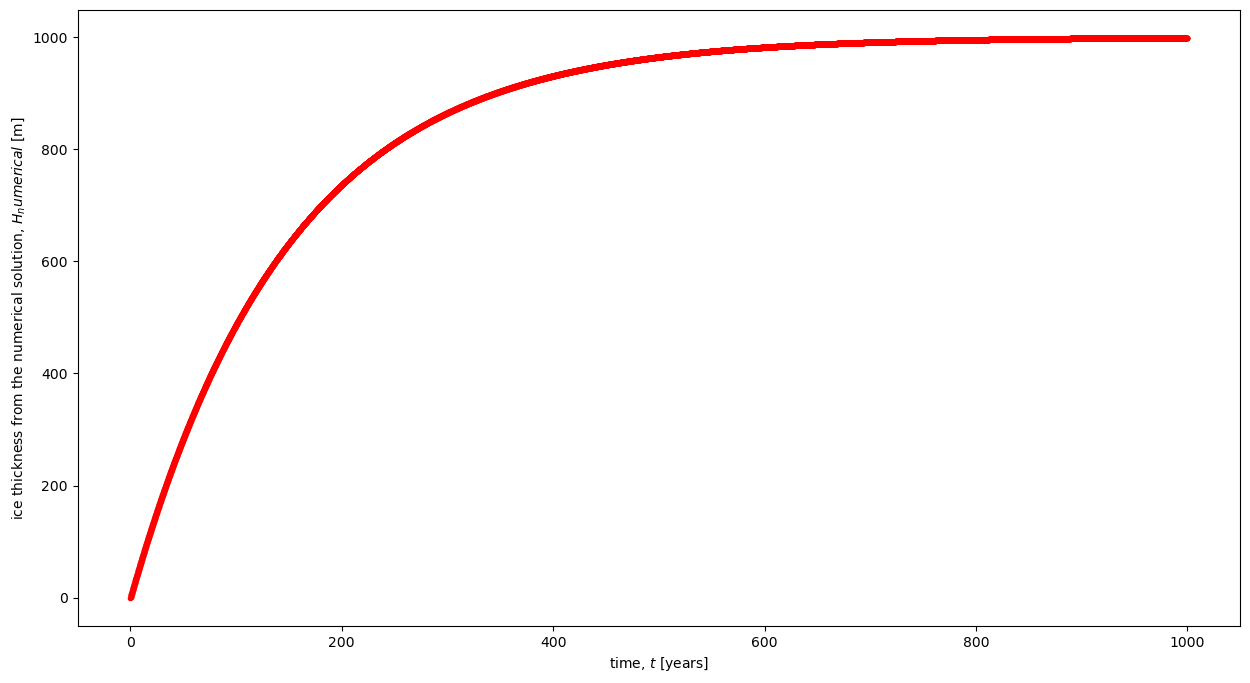

In [6]:
plt.figure(figsize=(15,8))
plt.plot(t,H_numerical,'.r')
plt.xlabel('time, $t$ [years]')
plt.ylabel('ice thickness from the numerical solution, $H_numerical$ [m]');

## Compute the difference
How different are these two results? One way to test this is to take the root-mean-square of all the differences:


In [7]:
differences = H_numerical - H_analytical
RMS_difference = np.sqrt(np.mean(differences**2))
RMS_difference

0.06455688832529798

Now let's put this all together in to a function so that we can vary the time step and get out an RMS difference 

In [8]:
def RMS_difference(dt):
    t = np.arange(0, T, dt)
    
    # compute it analytically
    H_analytical = H_f * (1-np.exp(-t/B));  
    
    
    # compute it numerically
    H_numerical = t*0
    for index in np.arange(start = 1, stop = len(t)):
        H_numerical[index] = H_numerical[index-1] + dt*(H_f - H_numerical[index-1])/B
    differences = H_numerical - H_analytical
    
    
    return np.sqrt(np.mean(differences**2)), t, H_analytical, H_numerical 

In [9]:
RMS, t, H_analytical, H_numerical  = RMS_difference(dt=0.2)
RMS

0.12913891724280865

In [10]:
temp = RMS_difference(dt=0.2)[1]
temp

array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.994e+02, 9.996e+02,
       9.998e+02])

In [11]:
dt_vector = np.logspace(1, -2, num=50)
RMSmismatch = dt_vector*0.0
n=0
for dt in dt_vector: # loop over the different dt values
    RMSmismatch[n] = RMS_difference(dt=dt)[0]
    n+=1

In [12]:
dt_vector

array([10.        ,  8.68511374,  7.54312006,  6.55128557,  5.68986603,
        4.94171336,  4.29193426,  3.72759372,  3.23745754,  2.8117687 ,
        2.44205309,  2.12095089,  1.84206997,  1.59985872,  1.38949549,
        1.20679264,  1.04811313,  0.91029818,  0.79060432,  0.68664885,
        0.59636233,  0.51794747,  0.44984327,  0.39069399,  0.33932218,
        0.29470517,  0.25595479,  0.22229965,  0.19306977,  0.16768329,
        0.14563485,  0.12648552,  0.10985411,  0.09540955,  0.08286428,
        0.07196857,  0.06250552,  0.05428675,  0.04714866,  0.04094915,
        0.0355648 ,  0.03088844,  0.02682696,  0.02329952,  0.0202359 ,
        0.01757511,  0.01526418,  0.01325711,  0.01151395,  0.01      ])

In [13]:
RMSmismatch

array([6.58444785e+00, 5.68220645e+00, 4.93403208e+00, 4.27860103e+00,
       3.71132048e+00, 3.21570595e+00, 2.79364572e+00, 2.42033611e+00,
       2.10251048e+00, 1.82396029e+00, 1.58277759e+00, 1.37389699e+00,
       1.19309424e+00, 1.03506921e+00, 8.99080524e-01, 7.80584595e-01,
       6.77561485e-01, 5.88466966e-01, 5.11048067e-01, 4.43687279e-01,
       3.85346402e-01, 3.34617035e-01, 2.90602578e-01, 2.52340500e-01,
       2.19122783e-01, 1.90302860e-01, 1.65285368e-01, 1.43534880e-01,
       1.24656115e-01, 1.08261969e-01, 9.40221832e-02, 8.16543957e-02,
       7.09196873e-02, 6.15903375e-02, 5.34926520e-02, 4.64580576e-02,
       4.03481541e-02, 3.50424364e-02, 3.04342277e-02, 2.64322061e-02,
       2.29565236e-02, 1.99378007e-02, 1.73161686e-02, 1.50390839e-02,
       1.30615231e-02, 1.13440881e-02, 9.85244374e-03, 8.55689019e-03,
       7.43173371e-03, 6.45455824e-03])

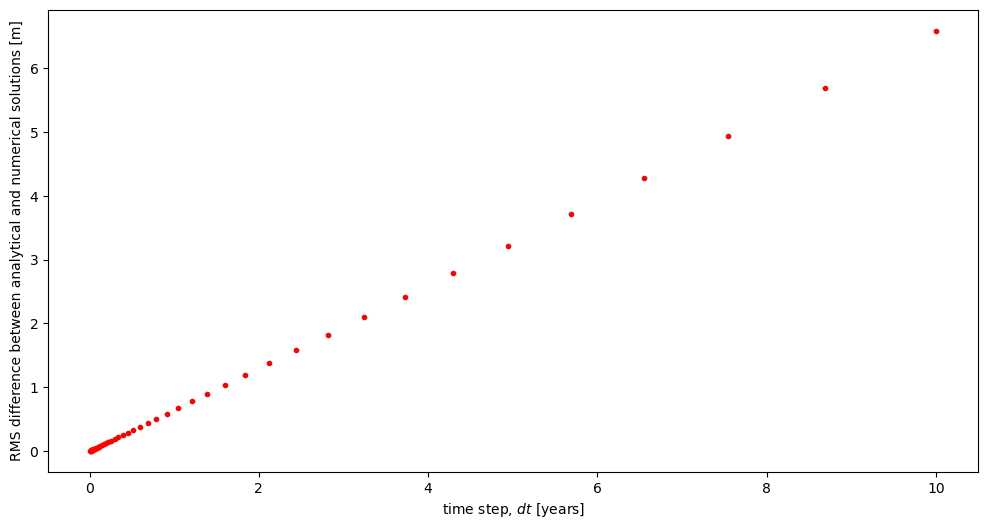

In [14]:
plt.figure(figsize=(12,6))
plt.plot(dt_vector,RMSmismatch,'.r')
plt.xlabel('time step, $dt$ [years]')
plt.ylabel('RMS difference between analytical and numerical solutions [m]');

/var/folders/gc/hfy654314d3gzj39h27fdx0r0000gn/T/ipykernel_85602/446369392.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(t,(H_analytical - H_numerical)/H_analytical,'.k')


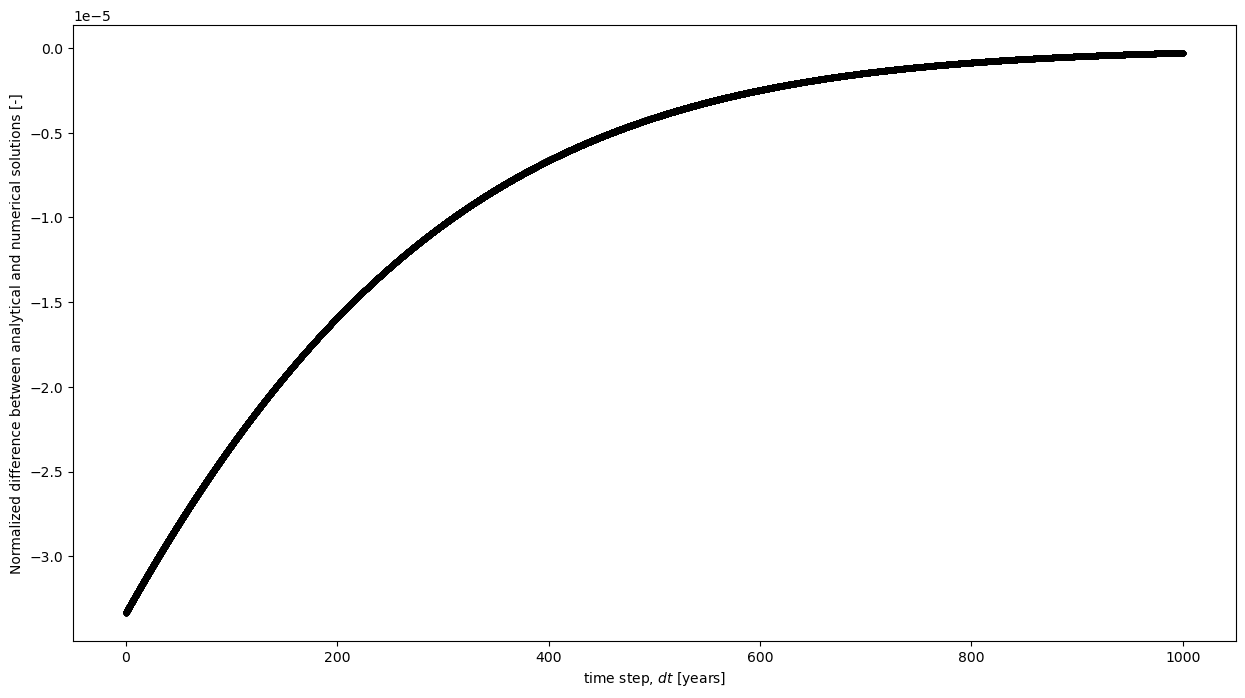

In [15]:
RMS, t, H_analytical, H_numerical  = RMS_difference(dt=0.01)
plt.figure(figsize=(15,8))
plt.plot(t,(H_analytical - H_numerical)/H_analytical,'.k')
plt.xlabel('time step, $dt$ [years]')
plt.ylabel('Normalized difference between analytical and numerical solutions [-]');

## A nicer way of arranging this code
A nicer way to arrange all this code that avoids repeating any code and groups it all together in a sensible way is as follows. 

In [22]:
H_f = 1000
B = 150.0
T = 1000       

def H_analytical(t):
    return H_f * (1-np.exp(-t/B))

def H_numerical(t):
    dt = t[1]-t[0]
    H_temp = t*0
    for index in np.arange(start = 1, stop = len(t)):
        H_temp[index] = H_temp[index-1] + dt*(H_f - H_temp[index-1])/B
    return H_temp 

def RMS(dt):       
    t = np.arange(0, T, dt)    
    return np.sqrt(np.mean( (H_numerical(t) - H_analytical(t))**2))

def convergence_test():
    dt_vector = np.logspace(1, -2, num=50)
    RMSout = dt_vector*0.0 
    n=0
    for dt in dt_vector: 
        RMSout[n] = RMS(dt)
        n+=1
    return dt_vector, RMSout
    

We can run RMS with different values of dt

In [23]:
RMS(dt=0.1), RMS(dt=0.001)

(0.06455688832529798, 0.0006454445255851715)

Or we can run a full convergence test and plot the results. 

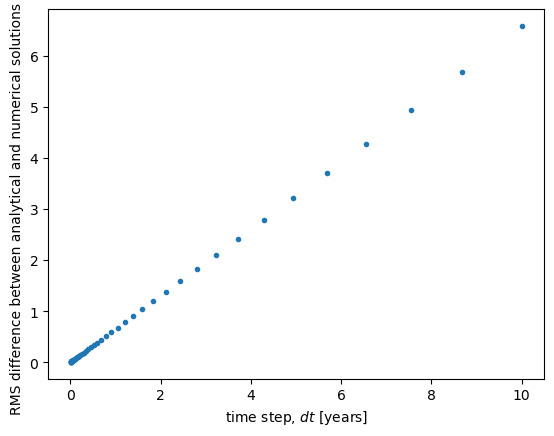

In [24]:
plt.plot(convergence_test()[0], convergence_test()[1],'.')
plt.xlabel('time step, $dt$ [years]')
plt.ylabel('RMS difference between analytical and numerical solutions [m]');